In [41]:
import pandas as pd
import numpy as np

df_test= pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [42]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
df_train.shape

(1460, 81)

In [44]:
pd.set_option('display.max_rows', None)  # Show all rows
df_train.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [45]:
pd.set_option('display.max_rows', None)  # Show all rows
df_test.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [46]:
high_missing_cats = ["Alley","PoolQC","Fence","MiscFeature","FireplaceQu",
                     "GarageType","GarageFinish","GarageQual","GarageCond",
                     "BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                     "BsmtFinType2","MasVnrType"]

for col in high_missing_cats:
    df_train[col] = df_train[col].fillna("None")
    df_test[col] = df_test[col].fillna("None")


In [47]:
high_missing_nums = ["MasVnrArea","GarageYrBlt","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
                     "GarageCars","GarageArea","BsmtFullBath","BsmtHalfBath"]
for col in high_missing_nums:
    df_train[col] = df_train[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)


In [48]:
df_train["LotFrontage"] = df_train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
df_test["LotFrontage"] = df_test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))


In [49]:
low_missing_cats = ["MSZoning","Utilities","Exterior1st","Exterior2nd","KitchenQual","Functional","SaleType","Electrical"]

for col in low_missing_cats:
    mode_val = df_train[col].mode()[0]  # fit from train
    df_train[col] = df_train[col].fillna(mode_val)
    df_test[col] = df_test[col].fillna(mode_val)


In [50]:
print(df_train.isnull().sum().sum())  
print(df_test.isnull().sum().sum())   

0
0


In [51]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
import warnings
warnings.filterwarnings("ignore")

In [53]:
df_train["LotConfig"].value_counts().sum

<bound method Series.sum of LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64>

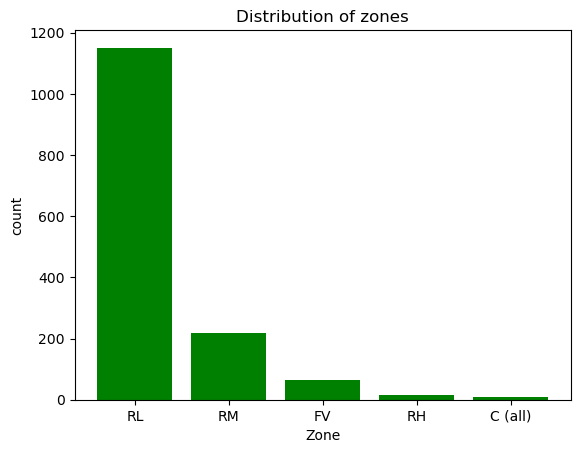

In [57]:
zone_counts = df_train['MSZoning'].value_counts()
plt.bar(zone_counts.index, zone_counts.values, color = "green")
plt.xlabel("Zone")
plt.ylabel("count")
plt.title("Distribution of zones")
plt.show()

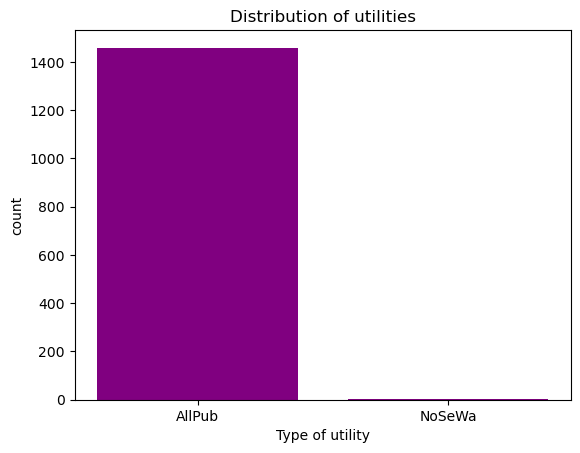

In [ ]:
utilities = df_train['Utilities'].value_counts()
plt.bar(utilities.index, utilities.values, color = "purple")
plt.xlabel("Type of utility")
plt.ylabel("count")
plt.title("Distribution of utilities")
plt.show()

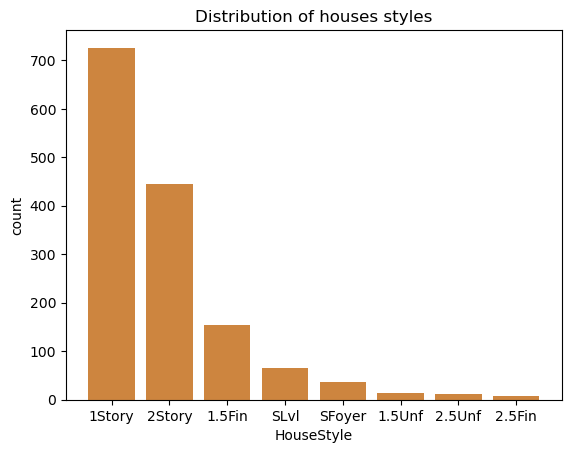

In [63]:
Housestyle = df_train['HouseStyle'].value_counts()
plt.bar(Housestyle.index, Housestyle.values, color = "peru")
plt.xlabel("HouseStyle")
plt.ylabel("count")
plt.title("Distribution of houses styles")
plt.show()

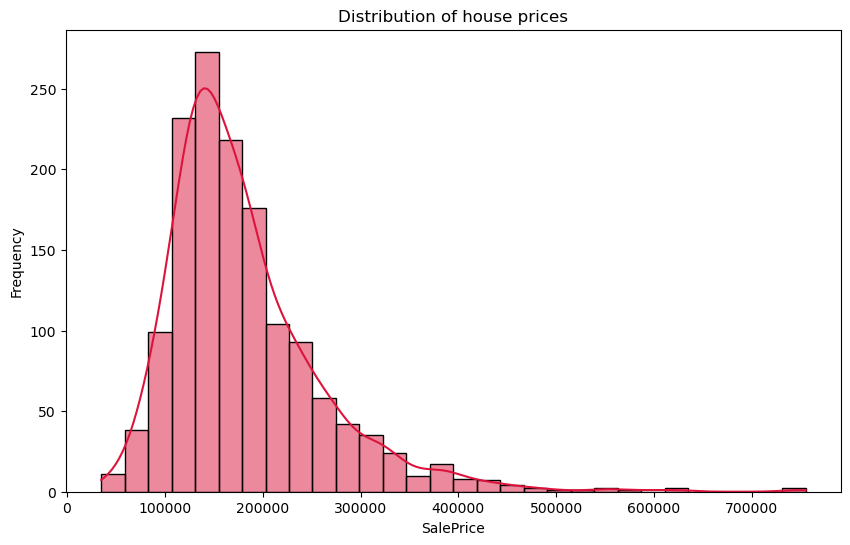

In [68]:
plt.figure(figsize = (10,6))
sns.histplot(df_train["SalePrice"], kde = True, bins = 30, color = "crimson")

plt.title("Distribution of house prices")
plt.ylabel("Frequency")
plt.xlabel("SalePrice")

plt.show()



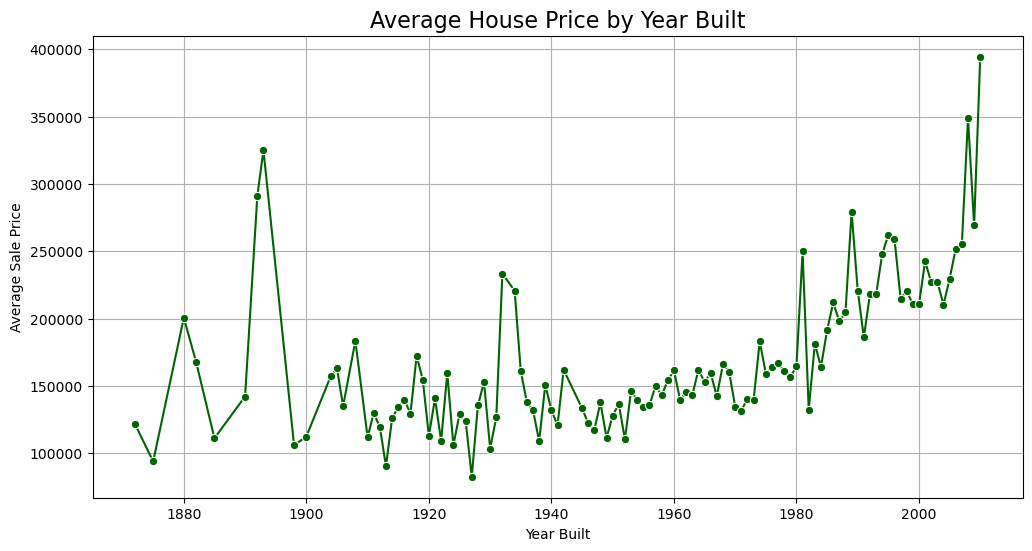

In [71]:
year_price = df_train.groupby("YearBuilt")["SalePrice"].mean().reset_index()

plt.figure(figsize = (12,6))
sns.lineplot(x = "YearBuilt", y = "SalePrice", data = year_price, marker = "o", color = "darkgreen")

plt.title("Average House Price by Year Built", fontsize = 16)
plt.xlabel("Year Built")
plt.ylabel("Average Sale Price")
plt.grid(True)
plt.show()

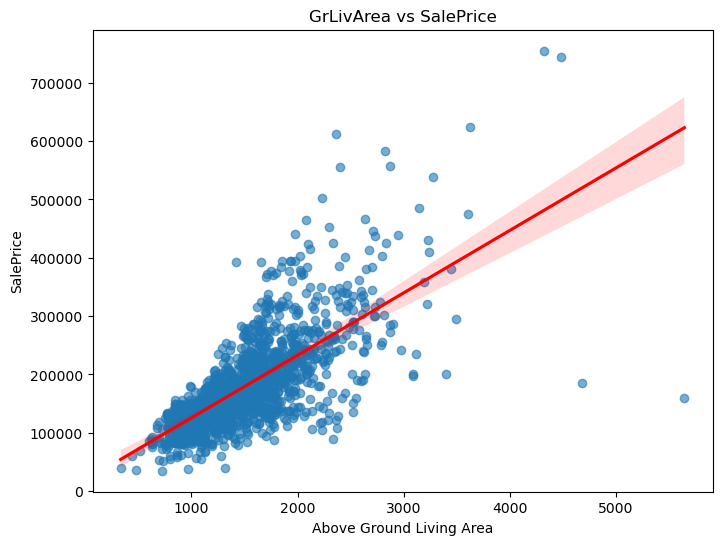

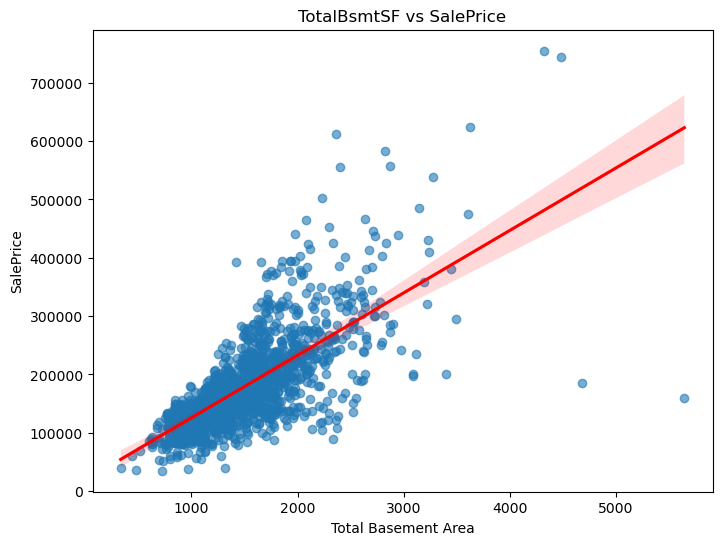

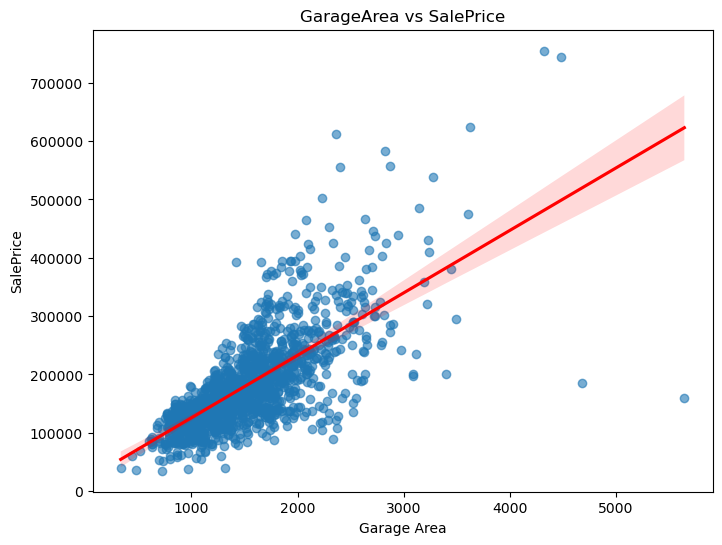

In [75]:
plt.figure(figsize = (8,6))
sns.regplot(x="GrLivArea", y="SalePrice", data=df_train, scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title("GrLivArea vs SalePrice")
plt.xlabel("Above Ground Living Area")
plt.ylabel("SalePrice")
plt.show()

plt.figure(figsize = (8,6))
sns.regplot(x="GrLivArea", y="SalePrice", data=df_train, scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title("TotalBsmtSF vs SalePrice")
plt.xlabel("Total Basement Area")
plt.ylabel("SalePrice")
plt.show()

plt.figure(figsize = (8,6))
sns.regplot(x="GrLivArea", y="SalePrice", data=df_train, scatter_kws={'alpha':0.6}, line_kws={"color":"red"})
plt.title("GarageArea vs SalePrice")
plt.xlabel("Garage Area")
plt.ylabel("SalePrice")
plt.show()

Top correlations with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.349876
Name: SalePrice, dtype: float64

Lowest correlations with SalePrice:
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


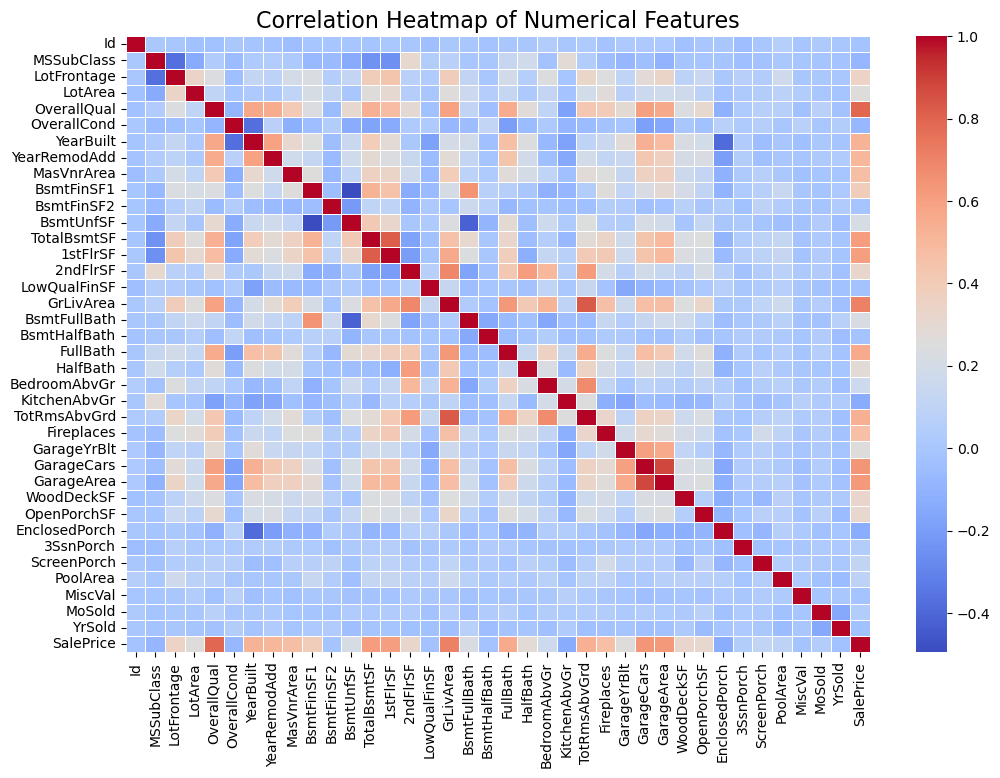

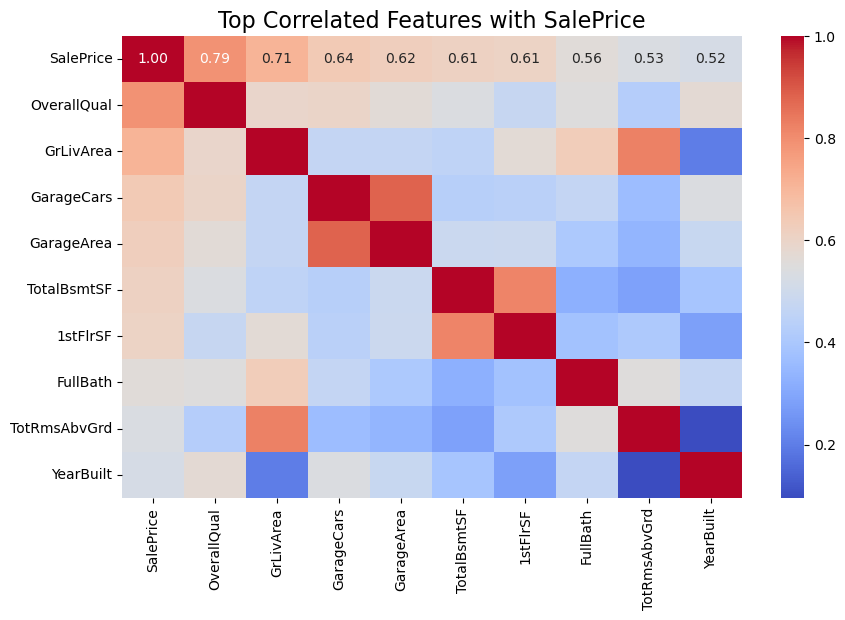

In [76]:


# Compute correlation matrix (numeric columns only)
corr_matrix = df_train.corr(numeric_only=True)

# Focus on correlations with SalePrice
saleprice_corr = corr_matrix["SalePrice"].sort_values(ascending=False)

print("Top correlations with SalePrice:")
print(saleprice_corr.head(15))  # Top 15 positive correlations
print("\nLowest correlations with SalePrice:")
print(saleprice_corr.tail(15))  # Lowest correlations

# Plot heatmap of correlations
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

# Optional: Heatmap of strongest correlations with SalePrice
top_corr_features = saleprice_corr.index[0:10]  # Top 10 features
plt.figure(figsize=(10,6))
sns.heatmap(df_train[top_corr_features].corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Top Correlated Features with SalePrice", fontsize=16)
plt.show()


📊 Descriptive Statistics (Numeric Variables):
                count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      70.199658     22.431902     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     22

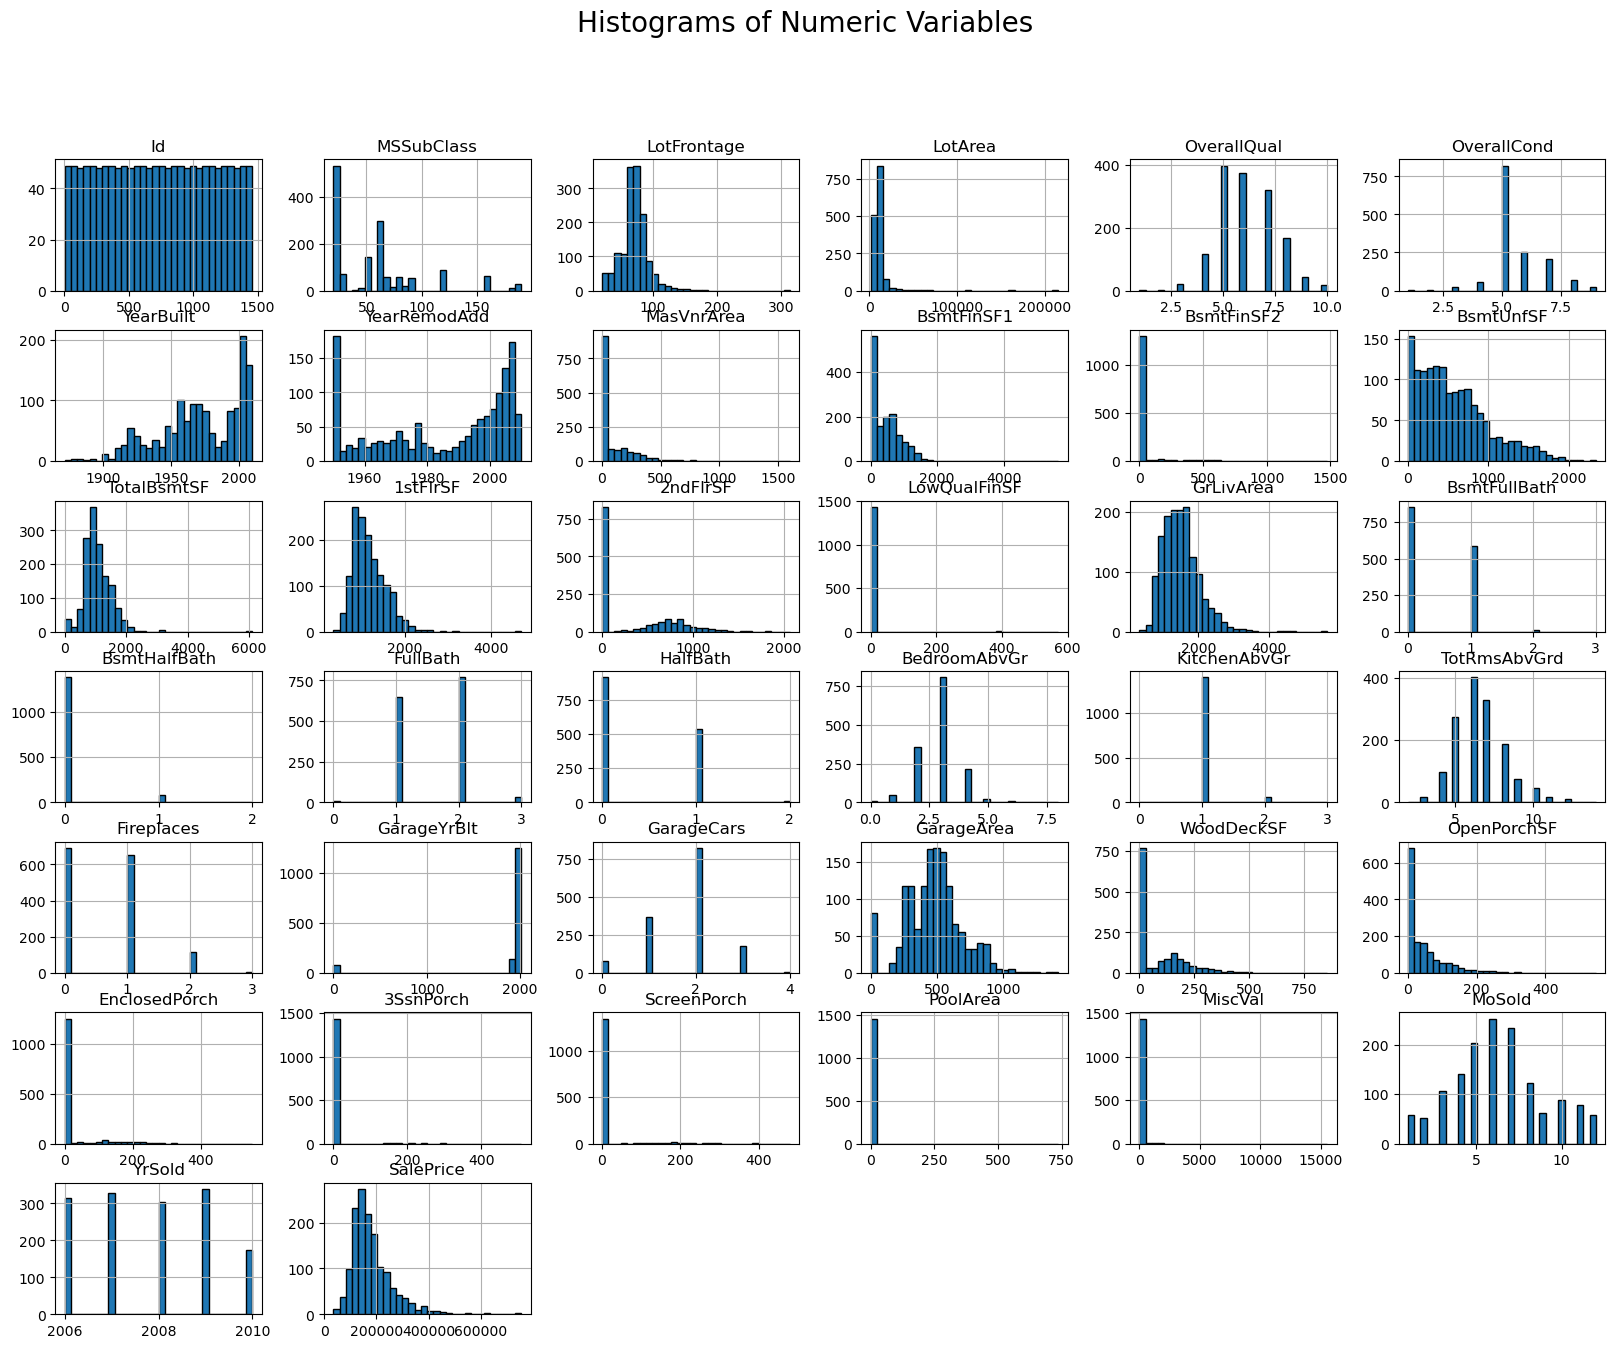


📊 Descriptive Statistics (Categorical Variables):
              count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley          1460      3     None  1369
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1460      4     None   872
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1460      

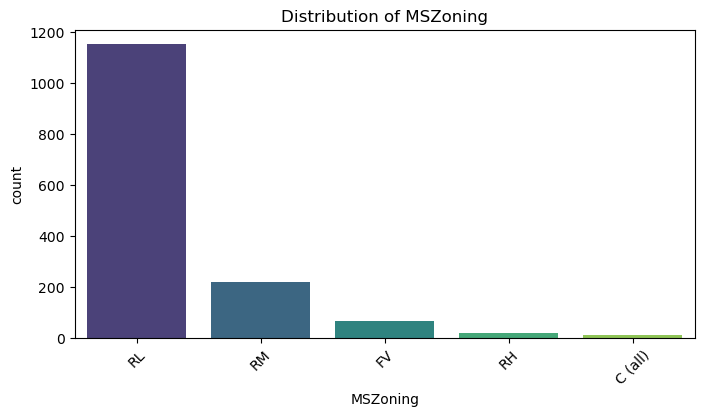

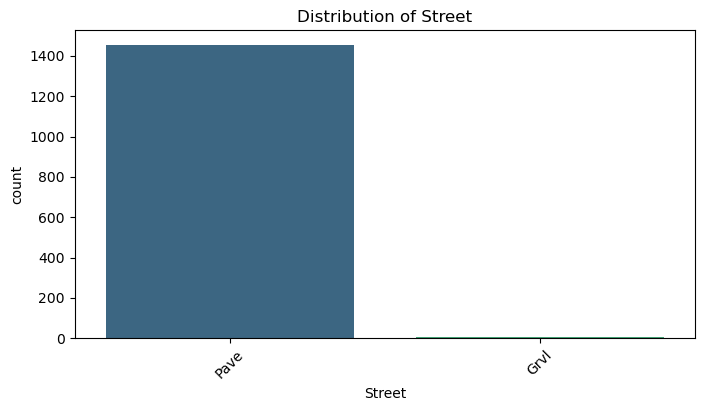

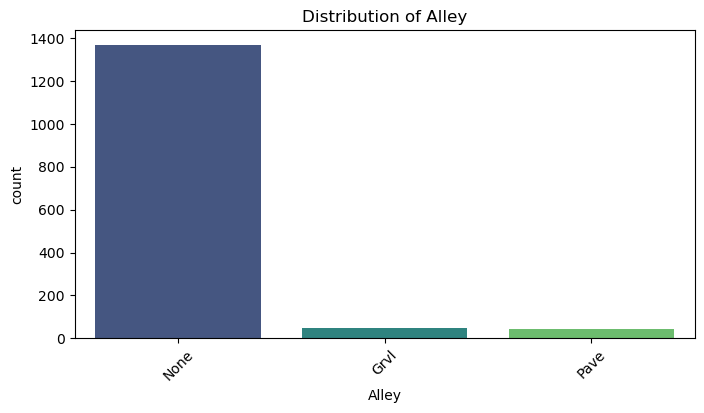

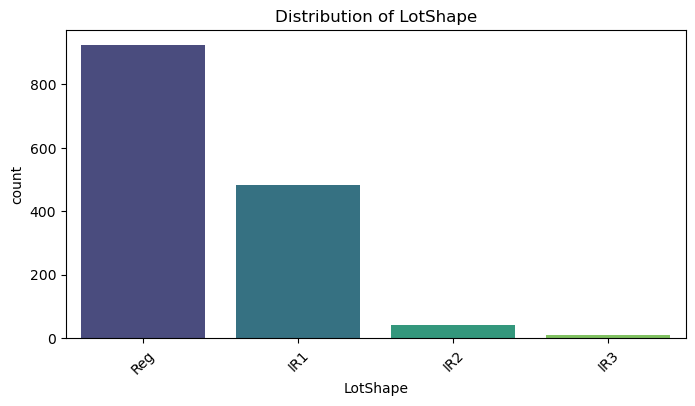

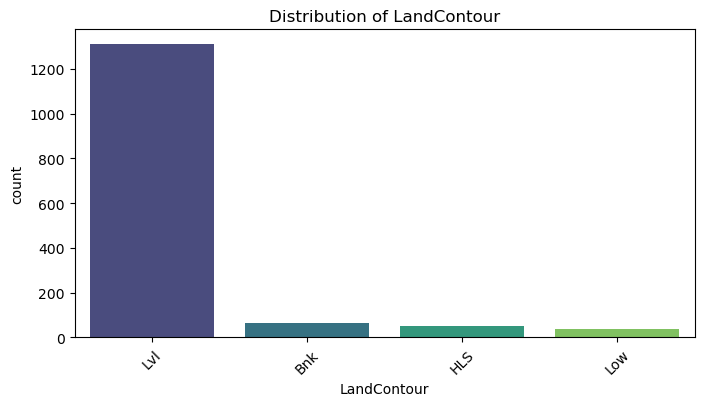

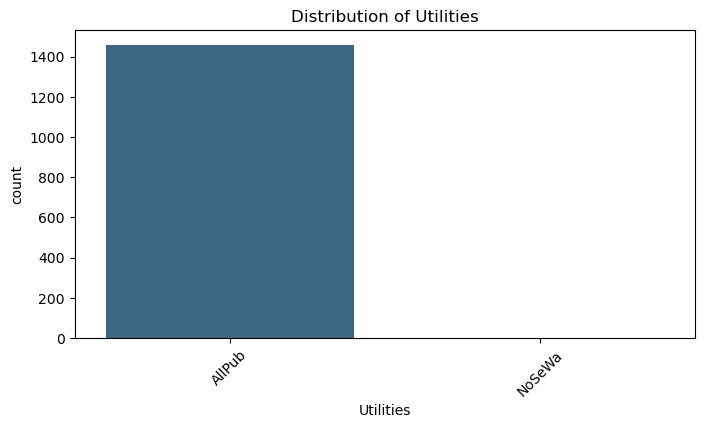

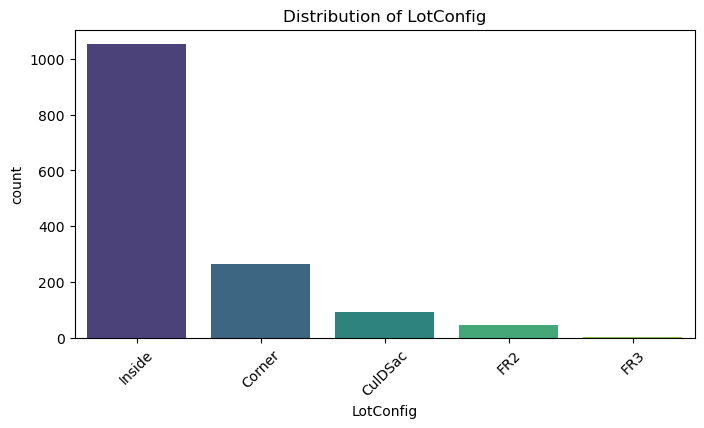

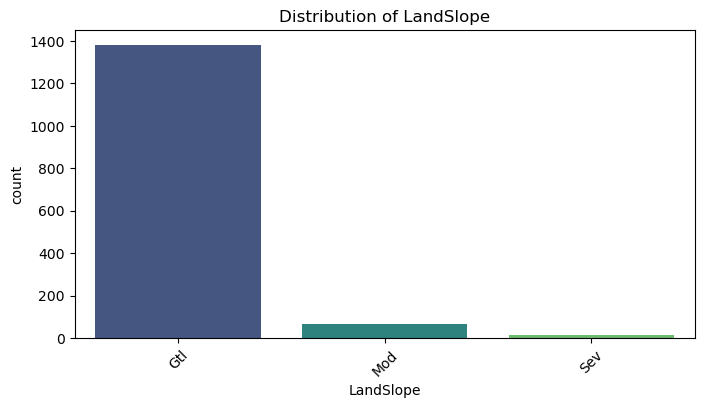

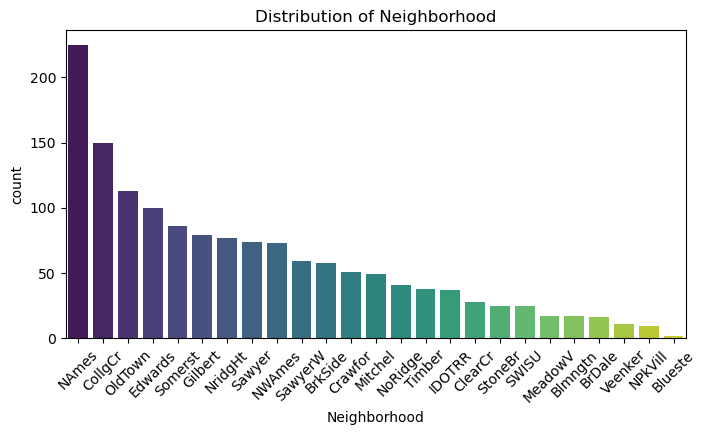

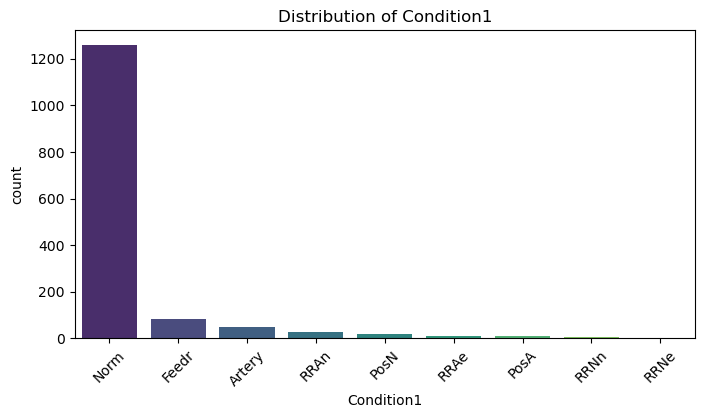

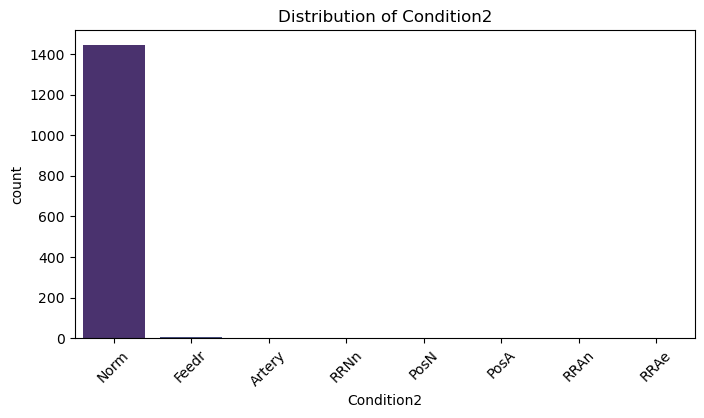

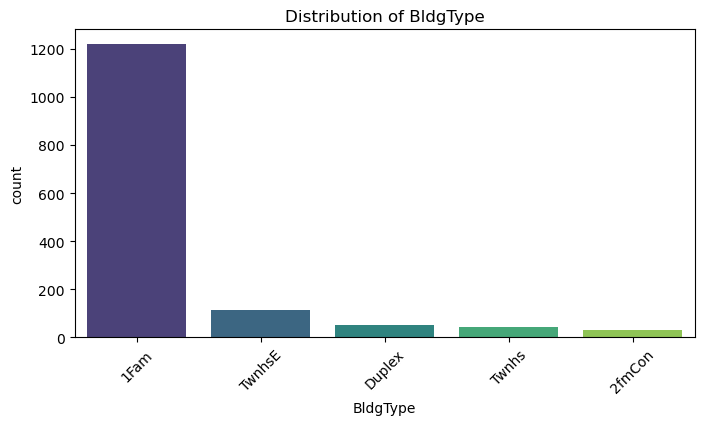

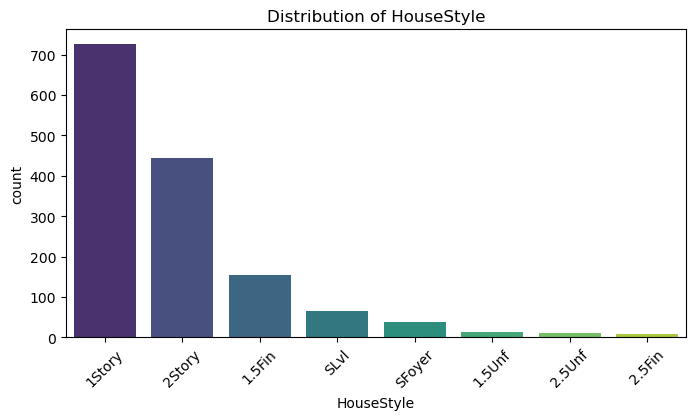

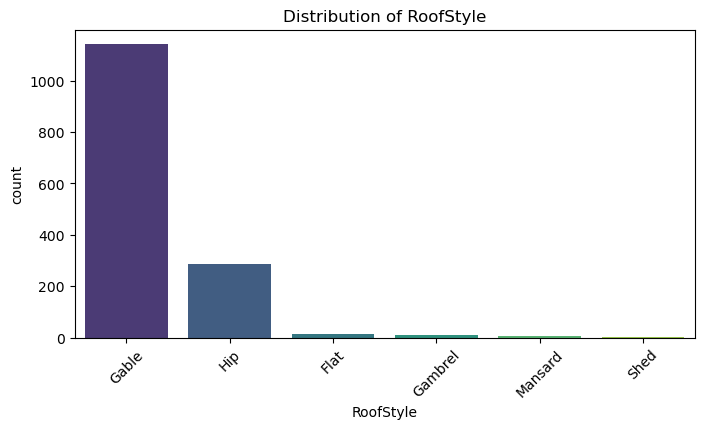

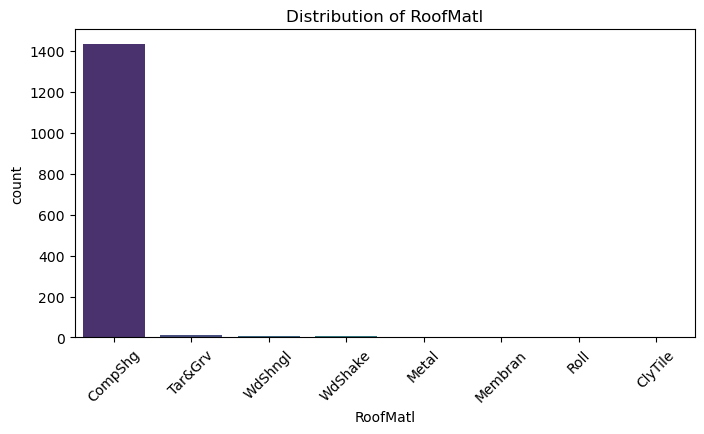

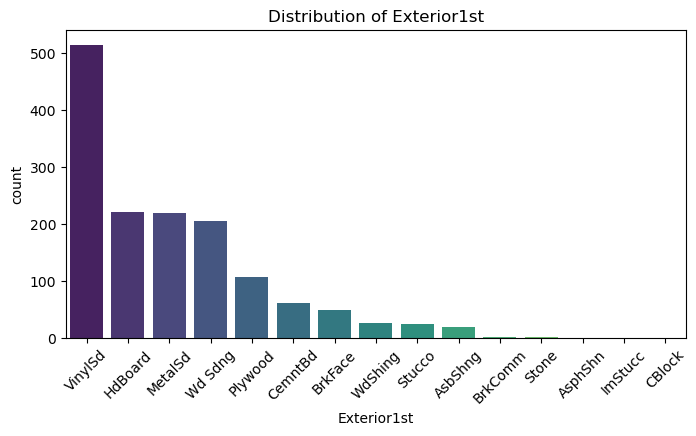

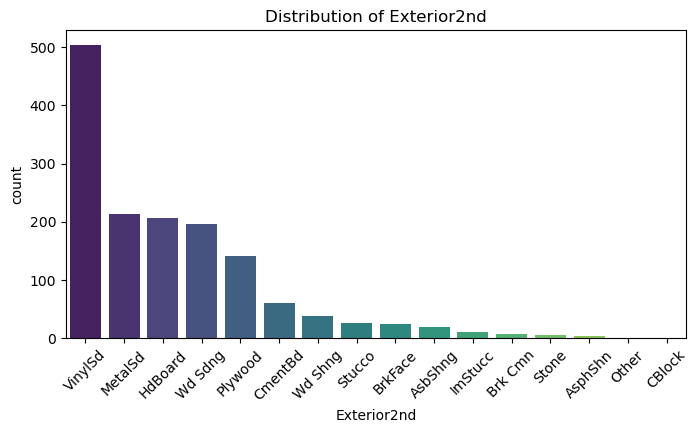

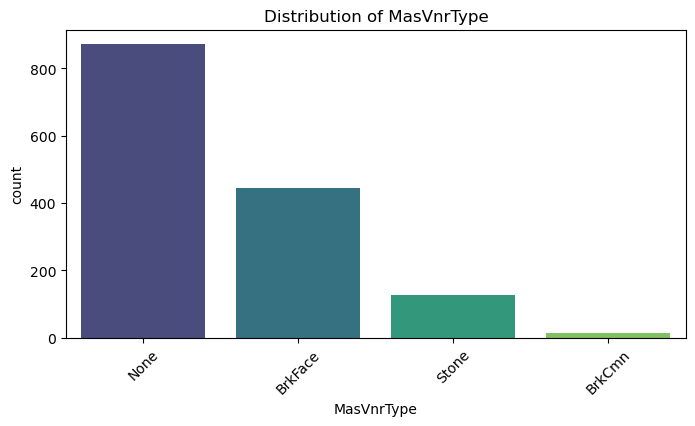

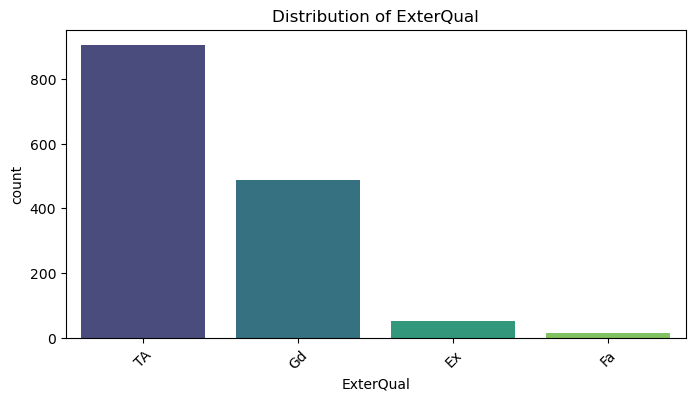

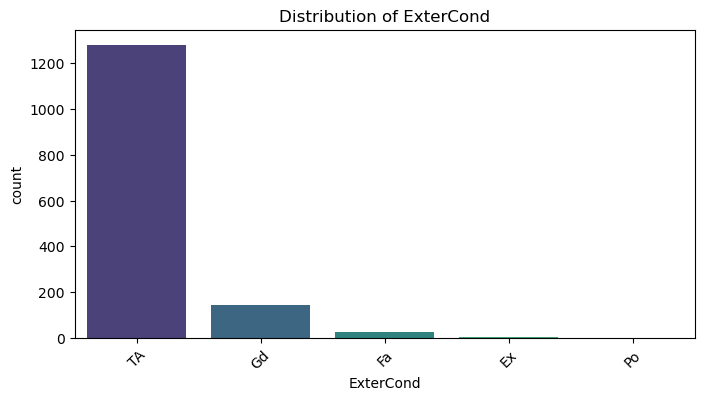

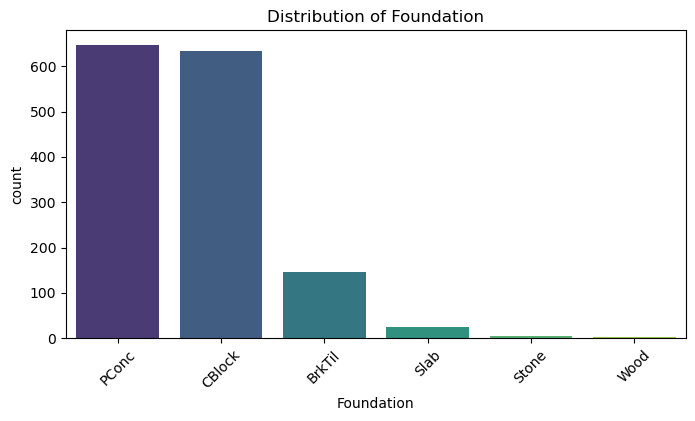

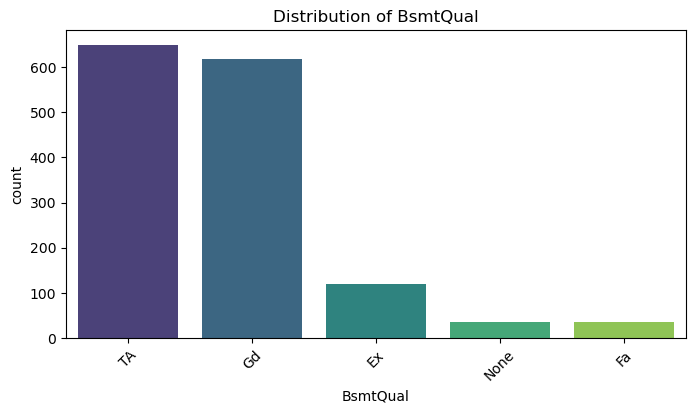

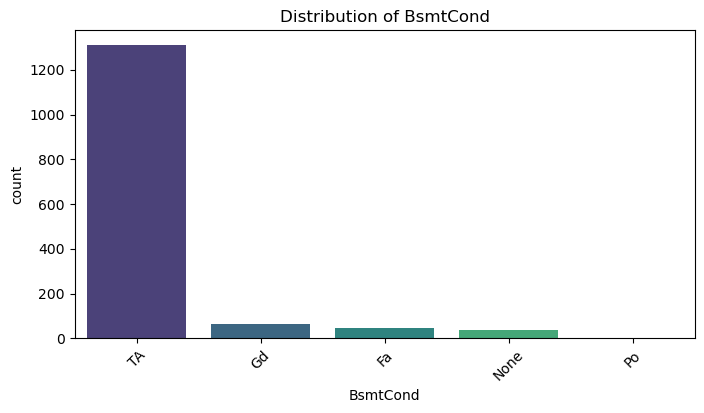

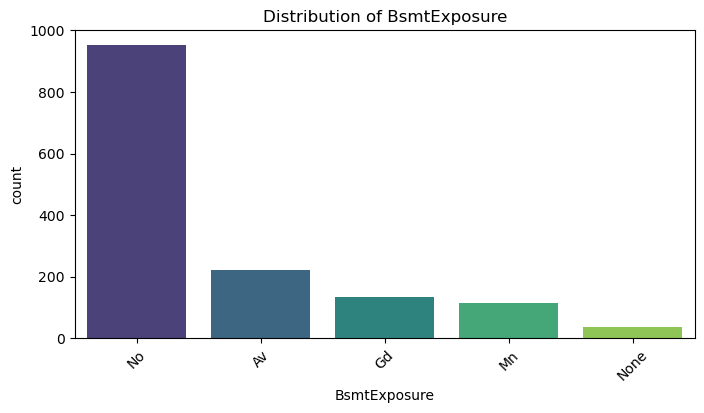

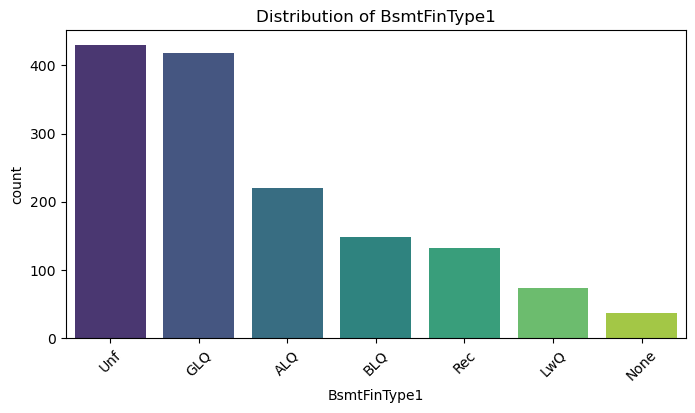

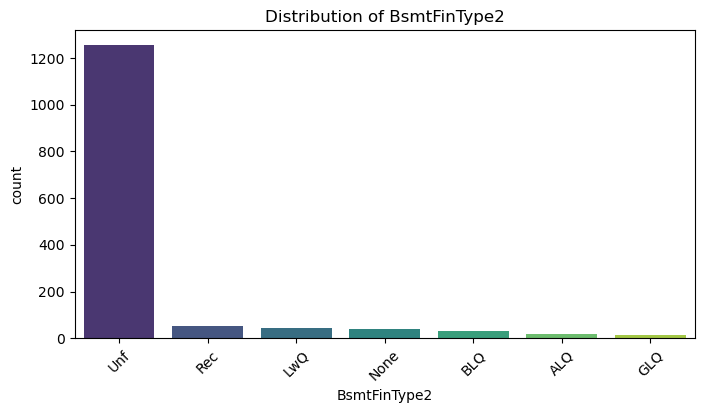

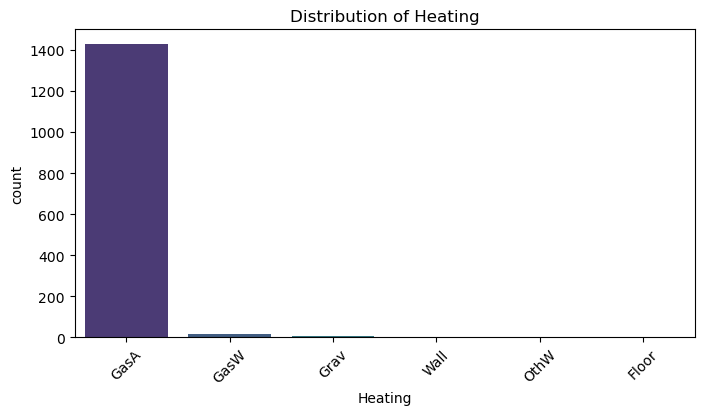

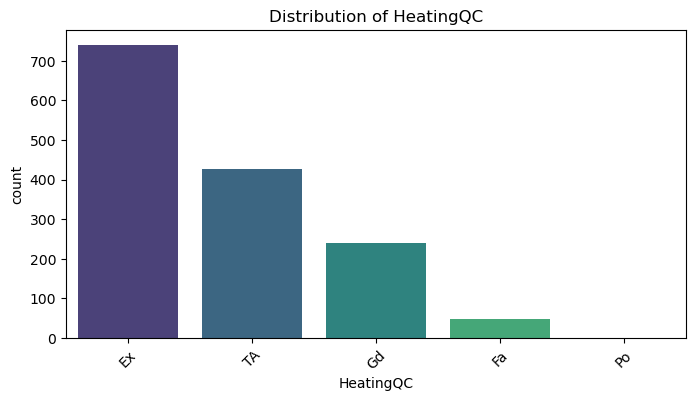

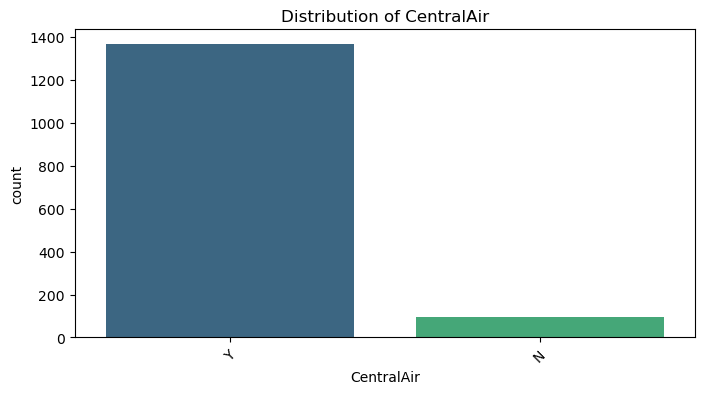

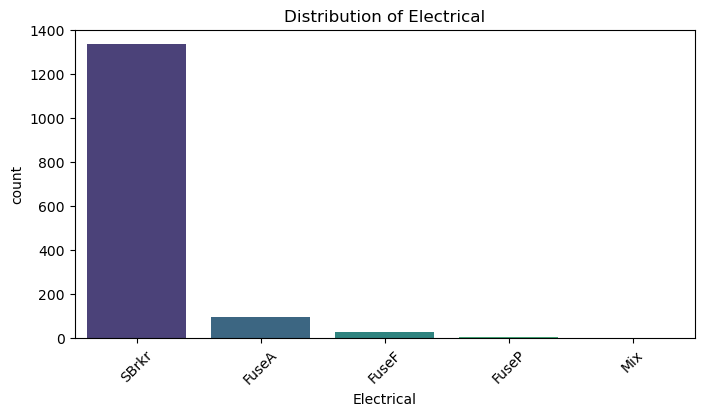

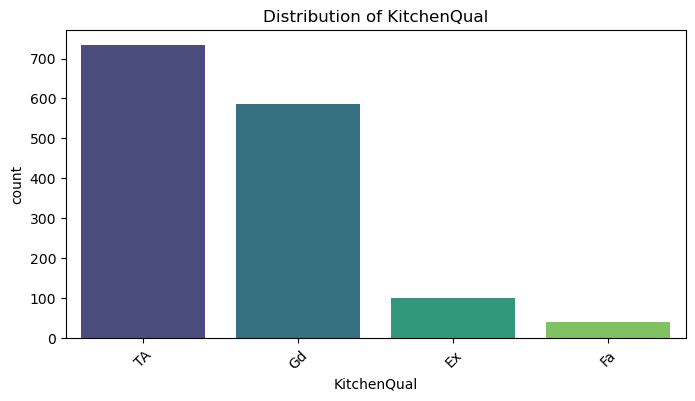

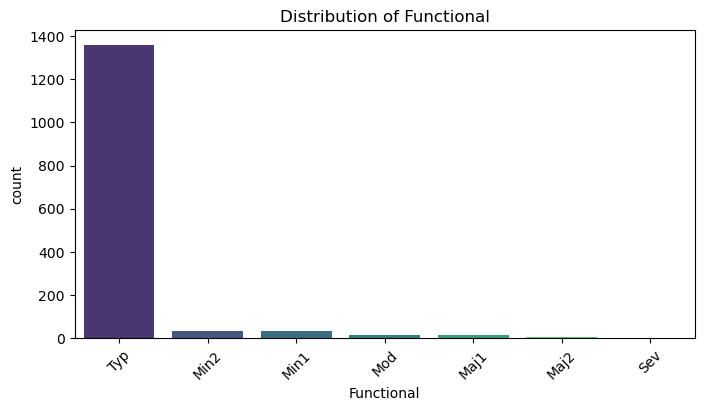

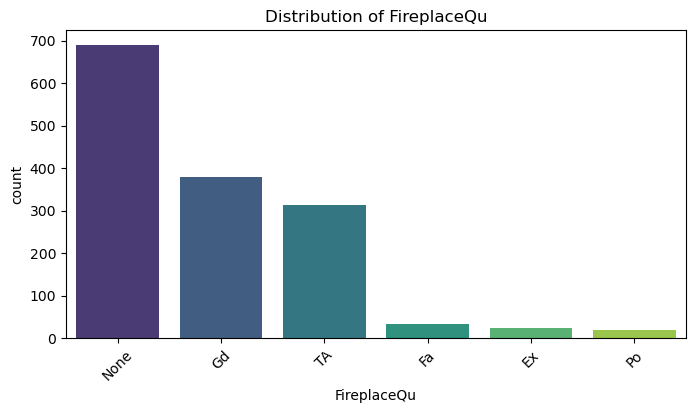

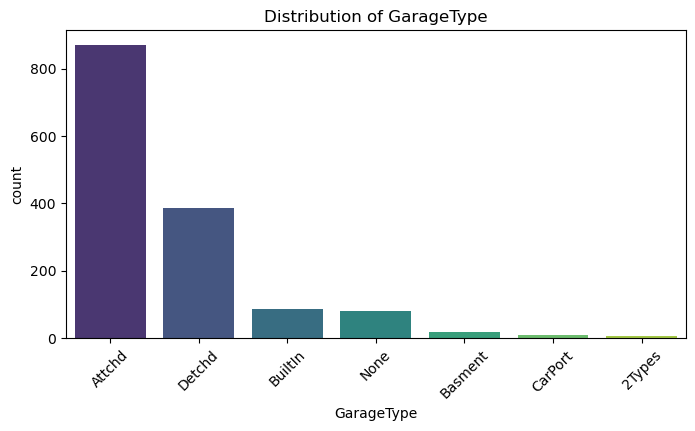

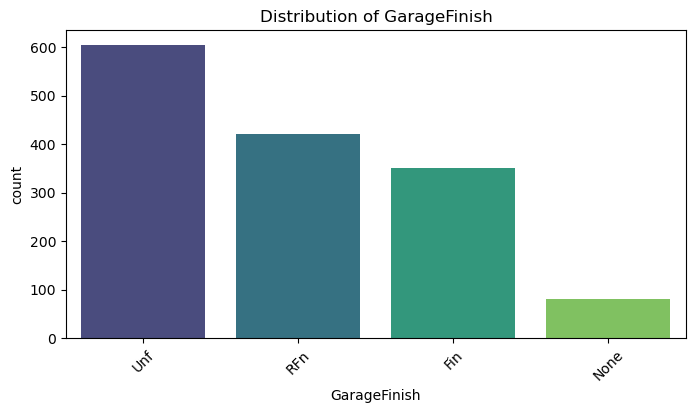

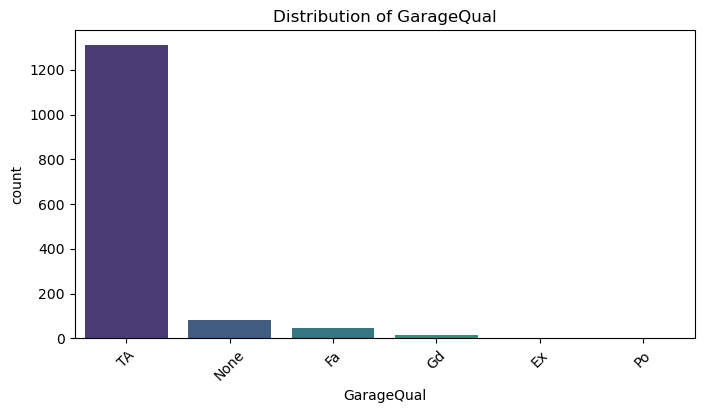

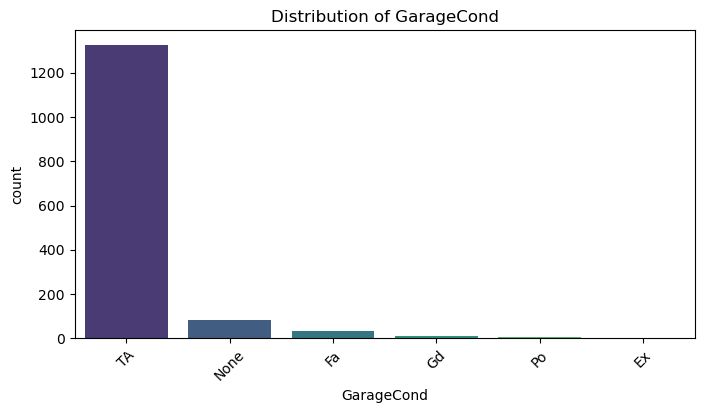

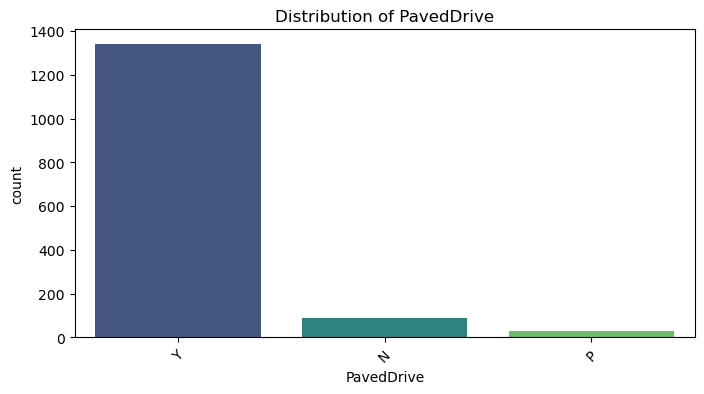

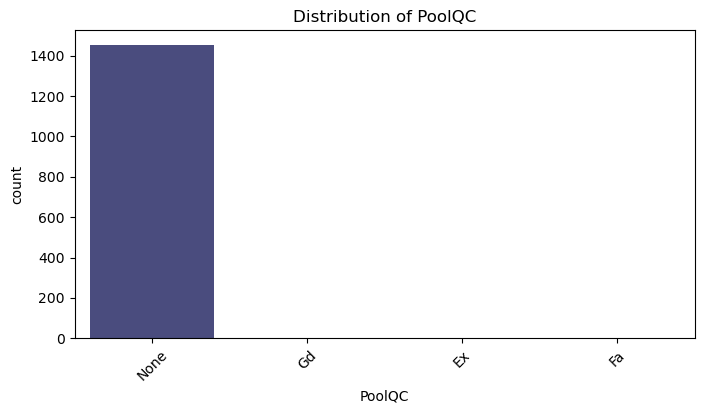

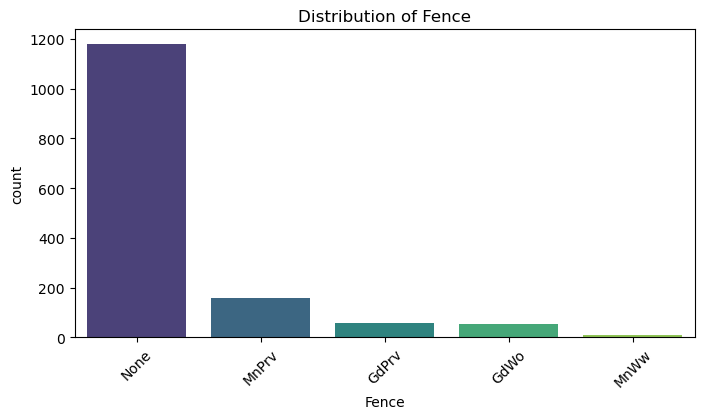

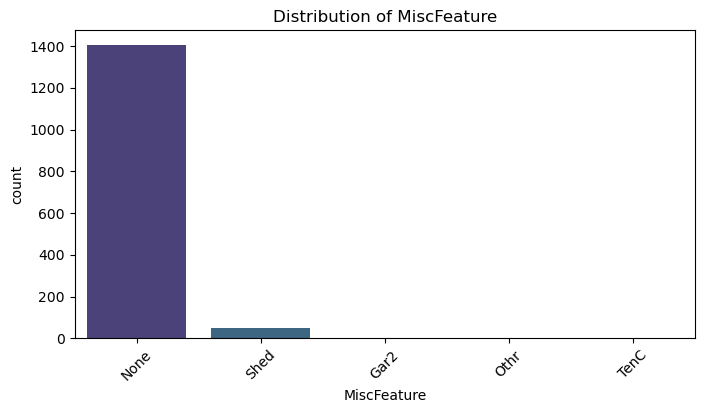

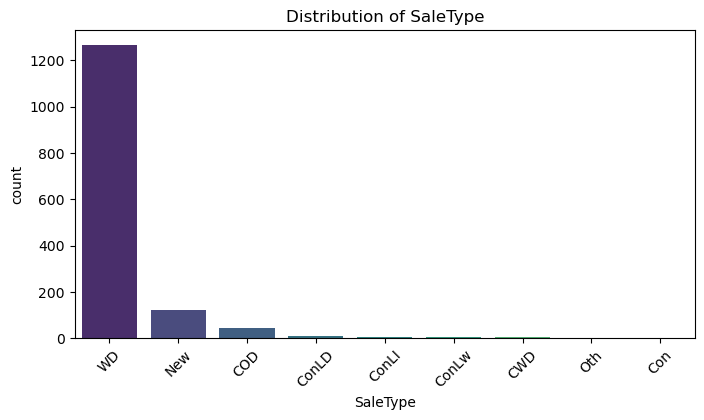

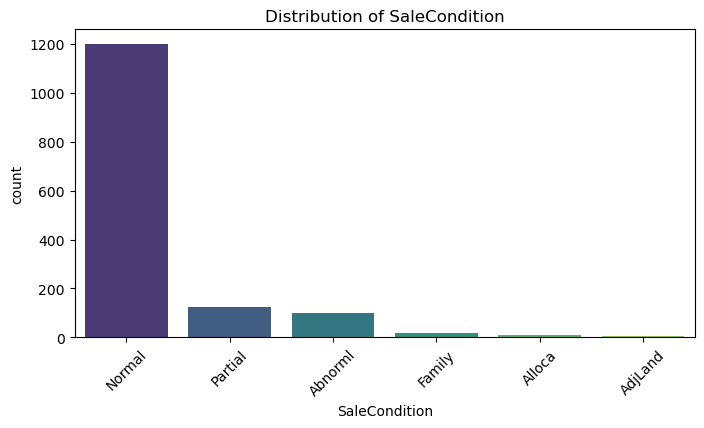

In [78]:

print("📊 Descriptive Statistics (Numeric Variables):")
print(df_train.describe().T)

print("\n📊 Skewness of numeric variables:")
print(df_train.skew(numeric_only=True))

print("\n📊 Kurtosis of numeric variables:")
print(df_train.kurt(numeric_only=True))

# Histograms with KDE for numeric variables
numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns
df_train[numeric_cols].hist(bins=30, figsize=(20, 15), edgecolor="black")
plt.suptitle("Histograms of Numeric Variables", fontsize=20)
plt.show()

# ==============================
# CATEGORICAL VARIABLES
# ==============================
print("\n📊 Descriptive Statistics (Categorical Variables):")
print(df_train.describe(include=['object']).T)

# Frequency counts with bar plots
categorical_cols = df_train.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.show()


In [79]:
from scipy import stats

# Drop missing values
df_anova = df_train[['MSZoning', 'SalePrice']].dropna()

# Group SalePrice by zoning category
groups = [group["SalePrice"].values for name, group in df_anova.groupby("MSZoning")]

# ANOVA test
f_stat, p_val = stats.f_oneway(*groups)
print("ANOVA test for MSZoning vs SalePrice")
print("F-statistic:", f_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("✅ Significant difference in SalePrice across MSZoning categories")
else:
    print("❌ No significant difference in SalePrice across MSZoning categories")


ANOVA test for MSZoning vs SalePrice
F-statistic: 43.84028167245718
p-value: 8.817633866272648e-35
✅ Significant difference in SalePrice across MSZoning categories


In [80]:
import statsmodels.api as sm

# Define predictor (GrLivArea) and target (SalePrice)
X = df_train[['GrLivArea']]   # Independent variable
y = df_train['SalePrice']     # Dependent variable

# Add constant (intercept)
X = sm.add_constant(X)

# Fit OLS regression
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sat, 16 Aug 2025   Prob (F-statistic):          4.52e-223
Time:                        11:02:37   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [82]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [81]:
y = np.log1p(df_train["SalePrice"])   # log-transform target
X = df_train.drop(["SalePrice", "Id"], axis=1)
X_test = df_test.drop(["Id"], axis=1)


In [83]:
cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(exclude=["object"]).columns

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)


In [84]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.001, max_iter=10000),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}


In [85]:
def rmse_cv(model, X, y):
    pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                               ("model", model)])
    scores = cross_val_score(pipeline, X, y,
                             scoring="neg_root_mean_squared_error",
                             cv=5)
    return -scores.mean()

In [86]:
for name, model in models.items():
    score = rmse_cv(model, X, y)
    print(f"{name}: CV RMSE = {score:.4f}")


Linear Regression: CV RMSE = 0.1459
Lasso Regression: CV RMSE = 0.1387
Random Forest: CV RMSE = 0.1429
Gradient Boosting: CV RMSE = 0.1238


In [89]:
best_model = GradientBoostingRegressor(n_estimators=200, random_state=42)

pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", best_model)])
pipeline.fit(X, y)

# Predict on test data (reverse log-transform)
test_preds = np.expm1(pipeline.predict(X_test))
print(test_preds)


[123455.73855395 154921.77934579 186879.34858766 ... 151287.19008868
 117164.89481368 235524.10826466]


In [90]:
# Tuned Gradient Boosting Regressor
gb_tuned = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

# Build pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", gb_tuned)
])

# Cross-validation (using neg_mean_squared_error, so take sqrt and negate)
cv_rmse = np.sqrt(-cross_val_score(pipeline, X, y,
                                   scoring="neg_mean_squared_error",
                                   cv=5))

print("Cross-validation RMSE scores:", cv_rmse)
print("Mean CV RMSE:", cv_rmse.mean())

Cross-validation RMSE scores: [0.11301294 0.13711058 0.12726885 0.11251108 0.12166618]
Mean CV RMSE: 0.12231392569690713


In [92]:
best_model = GradientBoostingRegressor(
    n_estimators=500,     # more trees
    learning_rate=0.05,   # slower learning for stability
    max_depth=3,          # shallow trees avoid overfitting
    random_state=42
)

# Build pipeline with preprocessing + model
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", best_model)
])

# Fit on training data
pipeline.fit(X, y)

# Predict on test data (reverse log-transform)
test_preds = np.expm1(pipeline.predict(X_test))

# Save submission
submission = pd.DataFrame({"Id": df_test["Id"], "SalePrice": test_preds})
submission.to_csv("submission.csv", index=False)

print("✅ Submission with tuned Gradient Boosting saved as submission.csv")

✅ Submission with tuned Gradient Boosting saved as submission.csv


In [91]:
submission = pd.DataFrame({"Id": df_test["Id"], "SalePrice": test_preds})
submission.to_csv("submission.csv", index=False)

In [93]:
import joblib

# Save the pipeline (preprocessing + model)
joblib.dump(pipeline, "house_price_model.pkl")


['house_price_model.pkl']

In [94]:


from sklearn.preprocessing import OneHotEncoder, StandardScaler




# Match features with Streamlit app
features = ["GrLivArea", "TotalBsmtSF", "GarageArea", "OverallQual", "MSZoning"]
X = df_train[features]
y = df_train["SalePrice"]

# Define categorical and numeric features
categorical_features = ["MSZoning"]
numeric_features = ["GrLivArea", "TotalBsmtSF", "GarageArea", "OverallQual"]

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

# Model
model = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1)

# Full pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])

# Train model
pipeline.fit(X, y)

# Save pipeline
joblib.dump(pipeline, "house_price_model.pkl")

print("✅ Model trained and saved as house_price_model.pkl with features:", features)



✅ Model trained and saved as house_price_model.pkl with features: ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OverallQual', 'MSZoning']
